# Check that turning dry dep off over US in AM3 worked

In [124]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_context('paper', font_scale=3)

## Global
__Plot raw concentrations at surface__

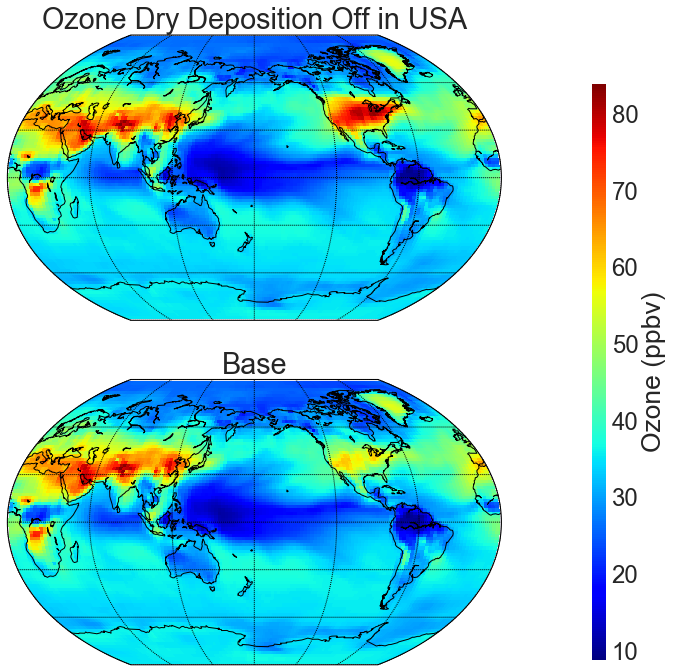

In [125]:
fname = 'senex.atmos_hourly.O3.nc'
path = 'simulations/'
sims = {'base/': 'Base', 'oz_dd_off_usa/': 'Ozone Dry Deposition Off in USA'}
fig = plt.figure(figsize=[10,10])
for idx, sim in enumerate(sims):
    # Set up subplot
    ax = fig.add_subplot(2,1,idx+1)
    
    # Import data
    f = Dataset(path + sim + fname, 'r')
    oz = f.variables['O3'][:-24, -1, :, :].mean(axis=0)
    lat = f.variables['grid_yt'][:]
    lon = f.variables['grid_xt'][:]
    lons, lats = np.meshgrid(lon, lat)
    
    # Set up map
    map = Basemap(projection='kav7', lon_0=-180., resolution='c', ax=ax)
    map.drawcoastlines()
    map.drawmeridians(np.arange(-180., 180., 60.))
    map.drawparallels(np.arange(-90., 99., 30.))
    
    x, y = map(lons, lats)
    ozmap = ax.pcolor(x, y, oz*1e9, cmap='jet')#, vmin=40., vmax=70.)
    ax.set_title(sims[sim])

plt.tight_layout()
plt.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.95, 0.05, 0.02, 0.8])
cbar = fig.colorbar(ozmap, cax=cbar_ax)
cbar.set_label('Ozone (ppbv)')

__Difference in ozone concentrations at surface__

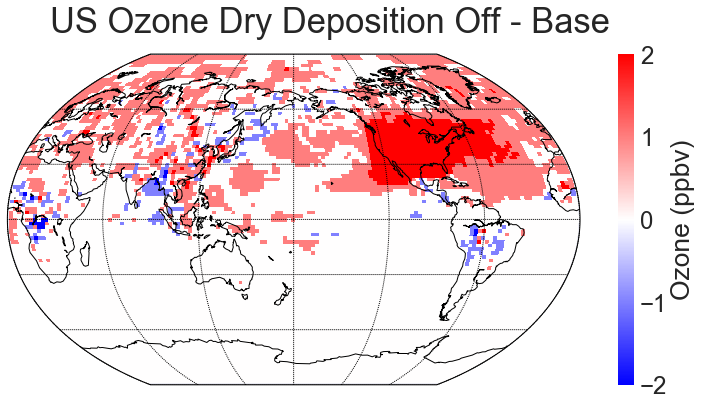

In [148]:
ozoff = Dataset('simulations/oz_dd_off_usa/senex.atmos_hourly.O3.nc', 'r')
basef = Dataset('simulations/base/senex.atmos_hourly.O3.nc', 'r')
ozo = ozoff.variables['O3'][:,-1,:,:].mean(axis=0)
bso = basef.variables['O3'][:-24,-1,:,:].mean(axis=0)
lat = ozoff.variables['grid_yt'][:]
lon = ozoff.variables['grid_xt'][:]
pre = ozoff.variables['pfull_sub01'][:]
lons, lats = np.meshgrid(lon, lat)

ozsn = ozo-bso
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
map = Basemap(projection='kav7', lon_0=-180., resolution='c', ax=ax)
map.drawcoastlines()
map.drawmeridians(np.arange(-180., 180., 60.))
map.drawparallels(np.arange(-90., 99., 30.))
    
x, y = map(lons, lats)
ozmap = ax.pcolor(x, y, np.round(ozsn*1e9, 0), cmap='bwr', vmin=-2, vmax=2)
cbar = plt.colorbar(ozmap)
cbar.set_label('Ozone (ppbv)')
cbar.set_ticks([-2., -1., 0., 1., 2.])
plt.suptitle('US Ozone Dry Deposition Off - Base')
plt.tight_layout()
plt.subplots_adjust(top=0.87, left=0.09)

__Difference across profile through lats (mean across hourly time and lons)__

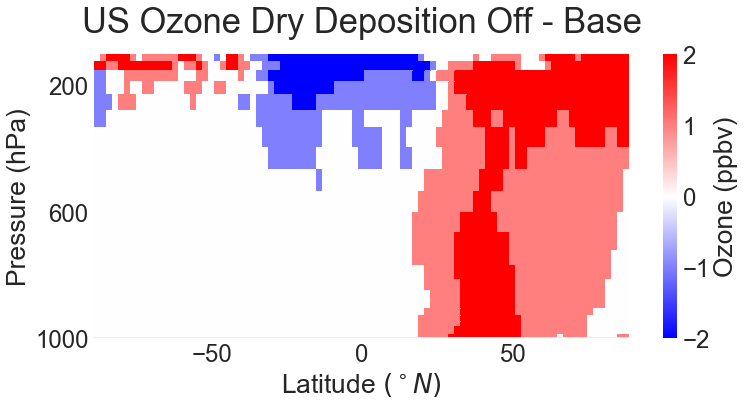

In [154]:
ozoff = Dataset('simulations/oz_dd_off_usa/senex.atmos_hourly.O3.nc', 'r')
basef = Dataset('simulations/base/senex.atmos_hourly.O3.nc', 'r')
ozo = ozoff.variables['O3'][:,:,:,:].mean(axis=0).mean(axis=-1)
bso = basef.variables['O3'][:-24,:,:,:].mean(axis=0).mean(axis=-1)
pre = ozoff.variables['pfull_sub01'][:]
lat = ozoff.variables['grid_yt'][:]

ozsn = ozo-bso
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
ozmap = ax.pcolor(lat, pre, np.round(ozsn*1e9, 0), cmap='bwr', vmin=-2, vmax=2)
plt.ylabel('Pressure (hPa)')
plt.xlabel('Latitude ' + r'$(^\circ N)$')
plt.yticks([200, 600, 1000])
plt.gca().invert_yaxis()
cbar = plt.colorbar(ozmap)
cbar.set_label('Ozone (ppbv)')
cbar.set_ticks([-2, -1, 0, 1, 2])

plt.suptitle('US Ozone Dry Deposition Off - Base')
plt.tight_layout()
plt.subplots_adjust(top=0.87, left=0.19)

__Difference across profile through lons__

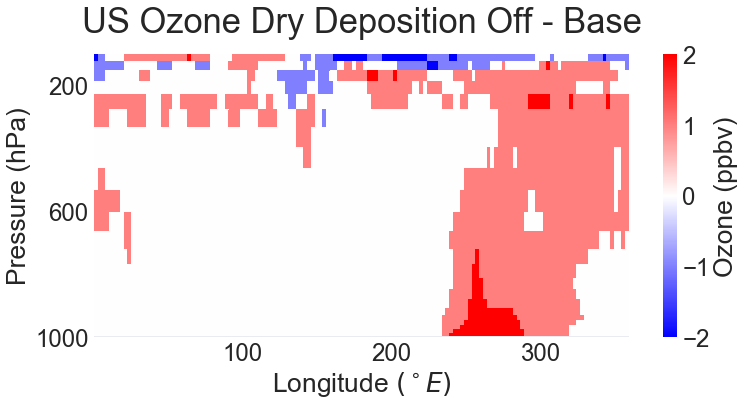

In [157]:
ozoff = Dataset('simulations/oz_dd_off_usa/senex.atmos_hourly.O3.nc', 'r')
basef = Dataset('simulations/base/senex.atmos_hourly.O3.nc', 'r')
ozo = ozoff.variables['O3'][:,:,:,:].mean(axis=0).mean(axis=-2)
bso = basef.variables['O3'][:-24,:,:,:].mean(axis=0).mean(axis=-2)
pre = ozoff.variables['pfull_sub01'][:]
lon = ozoff.variables['grid_xt'][:]

ozsn = ozo-bso
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
ozmap = ax.pcolor(lon, pre, np.round(ozsn*1e9, 0), cmap='bwr', vmin=-2, vmax=2)
plt.ylabel('Pressure (hPa)')
plt.xlabel('Longitude ' + r'$(^\circ E)$')
plt.yticks([200, 600, 1000])
plt.gca().invert_yaxis()
cbar = plt.colorbar(ozmap)
cbar.set_label('Ozone (ppbv)')
cbar.set_ticks([-2, -1, 0, 1, 2])

plt.suptitle('US Ozone Dry Deposition Off - Base')
plt.tight_layout()
plt.subplots_adjust(top=0.87, left=0.19)

__Difference across profile over time__

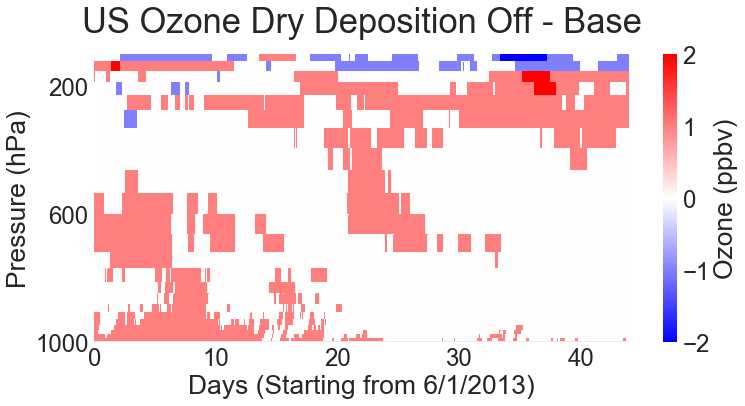

In [165]:
ozoff = Dataset('simulations/oz_dd_off_usa/senex.atmos_hourly.O3.nc', 'r')
basef = Dataset('simulations/base/senex.atmos_hourly.O3.nc', 'r')
ozo = ozoff.variables['O3'][:,:,:,:].mean(axis=-1).mean(axis=-1)
bso = basef.variables['O3'][:-24,:,:,:].mean(axis=-1).mean(axis=-1)
pre = ozoff.variables['pfull_sub01'][:]
tim = ozoff.variables['time'][:]

ozsn = ozo-bso
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
ozmap = ax.pcolor(tim - tim[0], pre, np.transpose(np.round(ozsn*1e9, 0)), cmap='bwr', vmin=-2, vmax=2)
plt.ylabel('Pressure (hPa)')
plt.xlabel('Days (Starting from 6/1/2013)')
plt.yticks([200, 600, 1000])
plt.gca().invert_yaxis()
cbar = plt.colorbar(ozmap)
cbar.set_label('Ozone (ppbv)')
cbar.set_ticks([-2, -1, 0, 1, 2])

plt.suptitle('US Ozone Dry Deposition Off - Base')
plt.tight_layout()
plt.subplots_adjust(top=0.87, left=0.19)